In [94]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [95]:
data = pd.read_json("result.json")
data

data['name'].value_counts()

сестра тюленям    11324
Name: name, dtype: int64

In [96]:
# удали type and id 
data = data.drop(['type', 'id'], axis=1)
data


,name,messages
0,сестра тюленям,"{'id': 3216, 'type': 'service', 'date': '2019-..."
1,сестра тюленям,"{'id': 3242, 'type': 'message', 'date': '2019-..."
2,сестра тюленям,"{'id': 3248, 'type': 'message', 'date': '2019-..."
3,сестра тюленям,"{'id': 3249, 'type': 'message', 'date': '2019-..."
4,сестра тюленям,"{'id': 3250, 'type': 'message', 'date': '2019-..."
...,...,...
11319,сестра тюленям,"{'id': 77328, 'type': 'message', 'date': '2023..."
11320,сестра тюленям,"{'id': 77329, 'type': 'message', 'date': '2023..."
11321,сестра тюленям,"{'id': 77332, 'type': 'message', 'date': '2023..."
11322,сестра тюленям,"{'id': 77333, 'type': 'message', 'date': '2023..."


In [97]:
data = data.drop(['name'], axis=1)

In [98]:
data['from'] = data['messages'].apply(lambda x: x['from'] if 'from' in x else None)
# посчитай уникальные значения в колонке photo
data['from'].value_counts()


Марк              5935
сестра тюленям    5355
Name: from, dtype: int64

In [99]:
data

,messages,from
0,"{'id': 3216, 'type': 'service', 'date': '2019-...",None
1,"{'id': 3242, 'type': 'message', 'date': '2019-...",сестра тюленям
2,"{'id': 3248, 'type': 'message', 'date': '2019-...",Марк
3,"{'id': 3249, 'type': 'message', 'date': '2019-...",Марк
4,"{'id': 3250, 'type': 'message', 'date': '2019-...",Марк
...,...,...
11319,"{'id': 77328, 'type': 'message', 'date': '2023...",Марк
11320,"{'id': 77329, 'type': 'message', 'date': '2023...",Марк
11321,"{'id': 77332, 'type': 'message', 'date': '2023...",сестра тюленям
11322,"{'id': 77333, 'type': 'message', 'date': '2023...",сестра тюленям


In [100]:
data['date'] = data['messages'].apply(lambda x: x['date'] if 'date' in x else None)
# посчитай уникальные значения в колонке photo
data['date'].value_counts()

2022-12-22T21:33:04    11
2023-01-25T17:36:36    11
2022-12-17T18:33:08     8
2022-07-30T00:06:05     8
2022-12-30T23:17:21     7
                       ..
2022-09-14T22:14:16     1
2022-09-14T22:14:38     1
2022-09-14T22:14:44     1
2022-09-14T22:15:30     1
2023-03-28T21:41:50     1
Name: date, Length: 10943, dtype: int64

In [101]:
data['file'] = data['messages'].apply(lambda x: x['mime_type'] if 'mime_type' in x else None)
# посчитай уникальные значения в колонке photo
data['file'].value_counts()


video/mp4                                                                  196
audio/ogg                                                                   83
image/jpeg                                                                  12
audio/mpeg                                                                   3
application/msword                                                           1
application/pdf                                                              1
image/png                                                                    1
application/vnd.openxmlformats-officedocument.wordprocessingml.document      1
Name: file, dtype: int64

In [102]:
# удали в messages все ключи и значения кроме text
data['messages'] = data['messages'].apply(lambda x: x['text'])
data

,messages,from,date,file
0,,None,2019-04-19T20:34:00,None
1,"Марк, так что вы там с Артёмом делали?",сестра тюленям,2019-04-19T22:01:13,None
2,О,Марк,2019-04-19T22:03:46,None
3,Лиза,Марк,2019-04-19T22:03:47,None
4,Хочешь конфиденциальную инфц,Марк,2019-04-19T22:04:01,None
...,...,...,...,...
11319,,Марк,2023-03-28T21:14:16,audio/mpeg
11320,,Марк,2023-03-28T21:15:40,video/mp4
11321,ожидаемо,сестра тюленям,2023-03-28T21:40:34,None
11322,жестко... но мне нравится))),сестра тюленям,2023-03-28T21:41:24,None


In [103]:
# переведи messenges в string 
data['messages'] = data['messages'].astype(str)
data

,messages,from,date,file
0,,None,2019-04-19T20:34:00,None
1,"Марк, так что вы там с Артёмом делали?",сестра тюленям,2019-04-19T22:01:13,None
2,О,Марк,2019-04-19T22:03:46,None
3,Лиза,Марк,2019-04-19T22:03:47,None
4,Хочешь конфиденциальную инфц,Марк,2019-04-19T22:04:01,None
...,...,...,...,...
11319,,Марк,2023-03-28T21:14:16,audio/mpeg
11320,,Марк,2023-03-28T21:15:40,video/mp4
11321,ожидаемо,сестра тюленям,2023-03-28T21:40:34,None
11322,жестко... но мне нравится))),сестра тюленям,2023-03-28T21:41:24,None


In [104]:
# удали все столбцы с none в from
data = data.dropna(subset=['from'])
data


,messages,from,date,file
1,"Марк, так что вы там с Артёмом делали?",сестра тюленям,2019-04-19T22:01:13,None
2,О,Марк,2019-04-19T22:03:46,None
3,Лиза,Марк,2019-04-19T22:03:47,None
4,Хочешь конфиденциальную инфц,Марк,2019-04-19T22:04:01,None
5,"Вся инфа, упомянутая в нашей беседе, конфиденц...",сестра тюленям,2019-04-19T22:24:31,None
...,...,...,...,...
11319,,Марк,2023-03-28T21:14:16,audio/mpeg
11320,,Марк,2023-03-28T21:15:40,video/mp4
11321,ожидаемо,сестра тюленям,2023-03-28T21:40:34,None
11322,жестко... но мне нравится))),сестра тюленям,2023-03-28T21:41:24,None


In [105]:
# удали знаки препинания и приведи к нижнему регистру messages
data['messages'] = data['messages'].apply(lambda x: x.lower())
data['messages'] = data['messages'].apply(lambda x: x.replace('.', ''))
data['messages'] = data['messages'].apply(lambda x: x.replace(',', ''))
data['messages'] = data['messages'].apply(lambda x: x.replace('!', ''))
data['messages'] = data['messages'].apply(lambda x: x.replace('?', ''))
data['messages'] = data['messages'].apply(lambda x: x.replace('(', ''))
data['messages'] = data['messages'].apply(lambda x: x.replace(')', ''))
data['messages'] = data['messages'].apply(lambda x: x.replace('«', ''))
data['messages'] = data['messages'].apply(lambda x: x.replace('»', ''))
data['messages'] = data['messages'].apply(lambda x: x.replace('—', ''))
data['messages'] = data['messages'].apply(lambda x: x.replace('–', ''))
data['messages'] = data['messages'].apply(lambda x: x.replace(';', ''))
data['messages'] = data['messages'].apply(lambda x: x.replace(':', ''))
data['messages'] = data['messages'].apply(lambda x: x.replace('№', ''))
data['messages'] = data['messages'].apply(lambda x: x.replace('“', ''))
data['messages'] = data['messages'].apply(lambda x: x.replace('”', ''))


/var/folders/rr/39767lj15dg81g2dbl4jq3rw0000gn/T/ipykernel_8706/1839050302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['messages'] = data['messages'].apply(lambda x: x.lower())
/var/folders/rr/39767lj15dg81g2dbl4jq3rw0000gn/T/ipykernel_8706/1839050302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['messages'] = data['messages'].apply(lambda x: x.replace('.', ''))
/var/folders/rr/39767lj15dg81g2dbl4jq3rw0000gn/T/ipykernel_8706/1839050302.py:4: SettingWithCopyWarning: 
A value is trying

In [106]:
# сделай токенизацию c помощью nltk
import nltk
from nltk.tokenize import word_tokenize
data['messages'] = data['messages'].apply(lambda x: word_tokenize(x))
data


/var/folders/rr/39767lj15dg81g2dbl4jq3rw0000gn/T/ipykernel_8706/3588559086.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['messages'] = data['messages'].apply(lambda x: word_tokenize(x))


,messages,from,date,file
1,"[марк, так, что, вы, там, с, артёмом, делали]",сестра тюленям,2019-04-19T22:01:13,None
2,[о],Марк,2019-04-19T22:03:46,None
3,[лиза],Марк,2019-04-19T22:03:47,None
4,"[хочешь, конфиденциальную, инфц]",Марк,2019-04-19T22:04:01,None
5,"[вся, инфа, упомянутая, в, нашей, беседе, конф...",сестра тюленям,2019-04-19T22:24:31,None
...,...,...,...,...
11319,[],Марк,2023-03-28T21:14:16,audio/mpeg
11320,[],Марк,2023-03-28T21:15:40,video/mp4
11321,[ожидаемо],сестра тюленям,2023-03-28T21:40:34,None
11322,"[жестко, но, мне, нравится]",сестра тюленям,2023-03-28T21:41:24,None


In [107]:
# удали предлоги 
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')
#data['messages'] = data['messages'].apply(lambda x: [word for word in x if word not in stop_words])
data


,messages,from,date,file
1,"[марк, так, что, вы, там, с, артёмом, делали]",сестра тюленям,2019-04-19T22:01:13,None
2,[о],Марк,2019-04-19T22:03:46,None
3,[лиза],Марк,2019-04-19T22:03:47,None
4,"[хочешь, конфиденциальную, инфц]",Марк,2019-04-19T22:04:01,None
5,"[вся, инфа, упомянутая, в, нашей, беседе, конф...",сестра тюленям,2019-04-19T22:24:31,None
...,...,...,...,...
11319,[],Марк,2023-03-28T21:14:16,audio/mpeg
11320,[],Марк,2023-03-28T21:15:40,video/mp4
11321,[ожидаемо],сестра тюленям,2023-03-28T21:40:34,None
11322,"[жестко, но, мне, нравится]",сестра тюленям,2023-03-28T21:41:24,None


In [108]:
# покажи 10 самых частых слов
from collections import Counter
words = []
for i in data['messages']:
    words += i
Counter(words).most_common(20)


[("'", 4289),
 ('не', 1084),
 ('я', 1005),
 ('и', 995),
 ('в', 968),
 ('а', 773),
 ('что', 748),
 ('{', 738),
 ("'type", 738),
 ("'text", 738),
 ('}', 738),
 ('это', 638),
 ('на', 600),
 ('ты', 598),
 ("'custom_emoji", 463),
 ("'document_id", 463),
 ('у', 441),
 ("'stickers/sticker", 429),
 ('с', 406),
 ('да', 388)]

In [109]:
# удали из messages слова: ' { type, text, custom_emoji
data['messages'] = data['messages'].apply(lambda x: [word for word in x if word not in ['{', 'type', 'text', 'custom_emoji',"'custom_emoji","'document_id","'stickers/sticker","[","]","'type","'text","'text",'``',"'","bold","https",'}']])
data


/var/folders/rr/39767lj15dg81g2dbl4jq3rw0000gn/T/ipykernel_8706/4213633320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['messages'] = data['messages'].apply(lambda x: [word for word in x if word not in ['{', 'type', 'text', 'custom_emoji',"'custom_emoji","'document_id","'stickers/sticker","[","]","'type","'text","'text",'``',"'","bold","https",'}']])


,messages,from,date,file
1,"[марк, так, что, вы, там, с, артёмом, делали]",сестра тюленям,2019-04-19T22:01:13,None
2,[о],Марк,2019-04-19T22:03:46,None
3,[лиза],Марк,2019-04-19T22:03:47,None
4,"[хочешь, конфиденциальную, инфц]",Марк,2019-04-19T22:04:01,None
5,"[вся, инфа, упомянутая, в, нашей, беседе, конф...",сестра тюленям,2019-04-19T22:24:31,None
...,...,...,...,...
11319,[],Марк,2023-03-28T21:14:16,audio/mpeg
11320,[],Марк,2023-03-28T21:15:40,video/mp4
11321,[ожидаемо],сестра тюленям,2023-03-28T21:40:34,None
11322,"[жестко, но, мне, нравится]",сестра тюленям,2023-03-28T21:41:24,None


In [110]:
# оставь в колонке name только со значением "сестра тюленям"
data1 = data[data['from'] == 'сестра тюленям']
data1
# уникальные значения в колонке name
data['from'].value_counts()

Марк              5935
сестра тюленям    5355
Name: from, dtype: int64

In [111]:
# покажи 10 самых частых слов
from collections import Counter
words = []
for i in data1['messages']:
    words += i
Counter(words).most_common(20)


[('не', 613),
 ('я', 475),
 ('а', 363),
 ('что', 349),
 ('в', 341),
 ('и', 324),
 ('ты', 298),
 ('это', 293),
 ('на', 231),
 ('марк', 191),
 ('у', 185),
 ('да', 167),
 ('как', 166),
 ('мне', 155),
 ('но', 150),
 ('с', 140),
 ('меня', 139),
 ('так', 130),
 ('нет', 118),
 ('все', 84)]

In [112]:
# покажи 10 самых частых слов
from collections import Counter
words = []
for i in data['messages']:
    words += i
Counter(words).most_common(20)


[('не', 1084),
 ('я', 1005),
 ('и', 995),
 ('в', 968),
 ('а', 773),
 ('что', 748),
 ('это', 638),
 ('на', 600),
 ('ты', 598),
 ('у', 441),
 ('с', 406),
 ('да', 388),
 ('как', 351),
 ('так', 325),
 ('но', 292),
 ('мне', 287),
 ('меня', 285),
 ('по', 245),
 ('там', 230),
 ('ну', 224)]

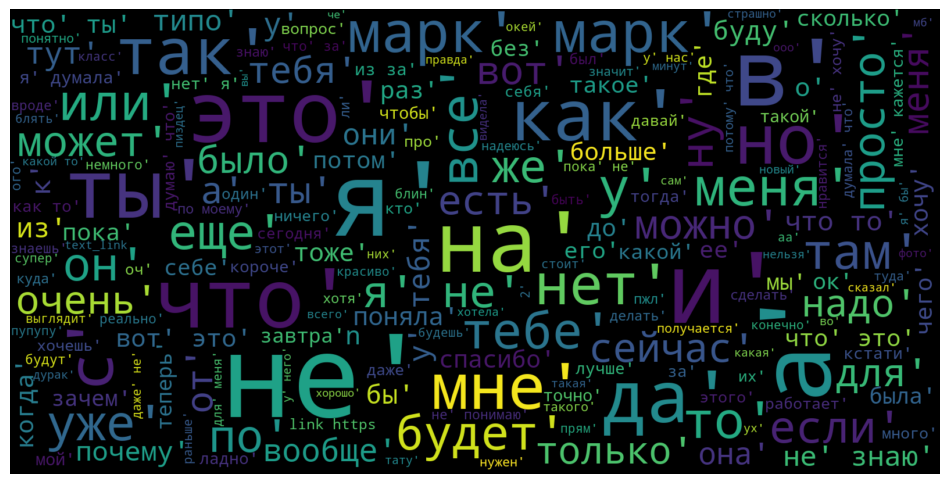

In [113]:
# создай облако слов из колонки messages по встречаемости слов и сделай большую картинку
from wordcloud import WordCloud
text = ' '.join(data1['messages'].astype(str))
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



In [114]:
# удали окончания у слов в колонке messages
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")
#data1['messages'] = data['messages'].apply(lambda x: [stemmer.stem(word) for word in x])
data1


,messages,from,date,file
1,"[марк, так, что, вы, там, с, артёмом, делали]",сестра тюленям,2019-04-19T22:01:13,None
5,"[вся, инфа, упомянутая, в, нашей, беседе, конф...",сестра тюленям,2019-04-19T22:24:31,None
16,"[там, же, с, первого, раза, не, у, всех, эффек...",сестра тюленям,2019-04-19T22:37:12,None
18,[капец],сестра тюленям,2019-04-19T22:37:17,None
19,"[это, правда]",сестра тюленям,2019-04-19T22:37:23,None
...,...,...,...,...
11315,"[если, массово, прям, будет]",сестра тюленям,2023-03-28T17:51:41,None
11316,"[может, надежда, есть]",сестра тюленям,2023-03-28T19:49:24,None
11321,[ожидаемо],сестра тюленям,2023-03-28T21:40:34,None
11322,"[жестко, но, мне, нравится]",сестра тюленям,2023-03-28T21:41:24,None


In [115]:
# turn data 1 messages  to text to csv
data1.to_csv('liza.csv', index=False)



In [116]:
# удали окончания у слов в колонке messages
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")
#data1['messages'] = data1['messages'].apply(lambda x: [stemmer.stem(word) for word in x])
#data1

from collections import Counter
words = []
for i in data['messages']:
    words += i
Counter(words).most_common(1000)

[('не', 1084),
 ('я', 1005),
 ('и', 995),
 ('в', 968),
 ('а', 773),
 ('что', 748),
 ('это', 638),
 ('на', 600),
 ('ты', 598),
 ('у', 441),
 ('с', 406),
 ('да', 388),
 ('как', 351),
 ('так', 325),
 ('но', 292),
 ('мне', 287),
 ('меня', 285),
 ('по', 245),
 ('там', 230),
 ('ну', 224),
 ('лиза', 208),
 ('все', 204),
 ('еще', 197),
 ('марк', 195),
 ('то', 195),
 ('нет', 186),
 ('он', 173),
 ('тебя', 168),
 ('тебе', 168),
 ('если', 164),
 ('просто', 152),
 ('уже', 146),
 ('или', 146),
 ('есть', 144),
 ("'link", 142),
 ('для', 141),
 ('вот', 139),
 ('за', 136),
 ('к', 127),
 ('будет', 126),
 ('из', 122),
 ('же', 121),
 ('может', 121),
 ('можно', 121),
 ('от', 120),
 ('бы', 106),
 ('хочу', 106),
 ('они', 104),
 ('она', 104),
 ('надо', 102),
 ('о', 98),
 ('чтобы', 98),
 ('было', 98),
 ("'🇷🇺", 96),
 ('очень', 95),
 ("'😀", 93),
 ('когда', 92),
 ('только', 89),
 ('его', 83),
 ('вообще', 83),
 ('сейчас', 82),
 ('тут', 79),
 ('почему', 78),
 ('до', 76),
 ('потом', 75),
 ('где', 75),
 ('тоже', 71),


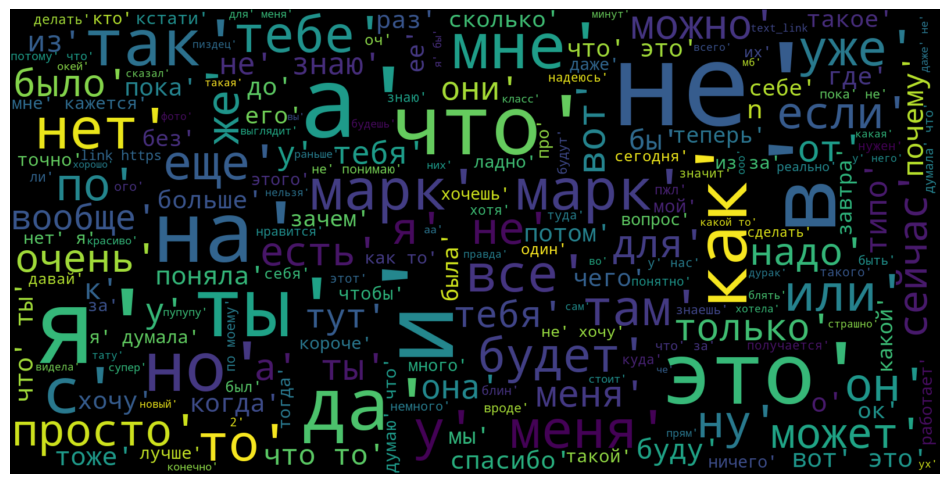

In [117]:
# создай облако слов из колонки messages по встречаемости слов и сделай большую картинку
from wordcloud import WordCloud
text = ' '.join(data1['messages'].astype(str))
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [118]:
data 

,messages,from,date,file
1,"[марк, так, что, вы, там, с, артёмом, делали]",сестра тюленям,2019-04-19T22:01:13,None
2,[о],Марк,2019-04-19T22:03:46,None
3,[лиза],Марк,2019-04-19T22:03:47,None
4,"[хочешь, конфиденциальную, инфц]",Марк,2019-04-19T22:04:01,None
5,"[вся, инфа, упомянутая, в, нашей, беседе, конф...",сестра тюленям,2019-04-19T22:24:31,None
...,...,...,...,...
11319,[],Марк,2023-03-28T21:14:16,audio/mpeg
11320,[],Марк,2023-03-28T21:15:40,video/mp4
11321,[ожидаемо],сестра тюленям,2023-03-28T21:40:34,None
11322,"[жестко, но, мне, нравится]",сестра тюленям,2023-03-28T21:41:24,None


In [119]:
df = data 
df.loc[(df['from'] == 'Марк') & (df['from'].shift(-1) == 'сестра тюленям')]
df

,messages,from,date,file
1,"[марк, так, что, вы, там, с, артёмом, делали]",сестра тюленям,2019-04-19T22:01:13,None
2,[о],Марк,2019-04-19T22:03:46,None
3,[лиза],Марк,2019-04-19T22:03:47,None
4,"[хочешь, конфиденциальную, инфц]",Марк,2019-04-19T22:04:01,None
5,"[вся, инфа, упомянутая, в, нашей, беседе, конф...",сестра тюленям,2019-04-19T22:24:31,None
...,...,...,...,...
11319,[],Марк,2023-03-28T21:14:16,audio/mpeg
11320,[],Марк,2023-03-28T21:15:40,video/mp4
11321,[ожидаемо],сестра тюленям,2023-03-28T21:40:34,None
11322,"[жестко, но, мне, нравится]",сестра тюленям,2023-03-28T21:41:24,None


In [120]:
df = data
df['from_shifted'] = df['from'].shift(1)

df['from_shifted_time'] = df['date'].shift(1)




/var/folders/rr/39767lj15dg81g2dbl4jq3rw0000gn/T/ipykernel_8706/23340393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['from_shifted'] = df['from'].shift(1)
/var/folders/rr/39767lj15dg81g2dbl4jq3rw0000gn/T/ipykernel_8706/23340393.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['from_shifted_time'] = df['date'].shift(1)


In [121]:
df

,messages,from,date,file,from_shifted,from_shifted_time
1,"[марк, так, что, вы, там, с, артёмом, делали]",сестра тюленям,2019-04-19T22:01:13,None,None,None
2,[о],Марк,2019-04-19T22:03:46,None,сестра тюленям,2019-04-19T22:01:13
3,[лиза],Марк,2019-04-19T22:03:47,None,Марк,2019-04-19T22:03:46
4,"[хочешь, конфиденциальную, инфц]",Марк,2019-04-19T22:04:01,None,Марк,2019-04-19T22:03:47
5,"[вся, инфа, упомянутая, в, нашей, беседе, конф...",сестра тюленям,2019-04-19T22:24:31,None,Марк,2019-04-19T22:04:01
...,...,...,...,...,...,...
11319,[],Марк,2023-03-28T21:14:16,audio/mpeg,Марк,2023-03-28T21:03:10
11320,[],Марк,2023-03-28T21:15:40,video/mp4,Марк,2023-03-28T21:14:16
11321,[ожидаемо],сестра тюленям,2023-03-28T21:40:34,None,Марк,2023-03-28T21:15:40
11322,"[жестко, но, мне, нравится]",сестра тюленям,2023-03-28T21:41:24,None,сестра тюленям,2023-03-28T21:40:34


In [122]:
df = df.drop(df[(df['from'] == 'сестра тюленям') & (df['from_shifted'] == 'сестра тюленям')].index)
df = df.drop(df[(df['from'] == 'Марк') & (df['from_shifted'] == 'Марк')].index)
df

,messages,from,date,file,from_shifted,from_shifted_time
1,"[марк, так, что, вы, там, с, артёмом, делали]",сестра тюленям,2019-04-19T22:01:13,None,None,None
2,[о],Марк,2019-04-19T22:03:46,None,сестра тюленям,2019-04-19T22:01:13
5,"[вся, инфа, упомянутая, в, нашей, беседе, конф...",сестра тюленям,2019-04-19T22:24:31,None,Марк,2019-04-19T22:04:01
6,"[ну, мы, короче, с, артёмом]",Марк,2019-04-19T22:35:45,None,сестра тюленям,2019-04-19T22:24:31
16,"[там, же, с, первого, раза, не, у, всех, эффек...",сестра тюленям,2019-04-19T22:37:12,None,Марк,2019-04-19T22:37:07
...,...,...,...,...,...,...
11310,[жестко],сестра тюленям,2023-03-28T12:01:02,None,Марк,2023-03-28T11:51:20
11311,[],Марк,2023-03-28T17:39:40,None,сестра тюленям,2023-03-28T12:01:02
11312,[не],сестра тюленям,2023-03-28T17:51:22,None,Марк,2023-03-28T17:39:40
11317,"[как, у, карапуза]",Марк,2023-03-28T20:04:15,None,сестра тюленям,2023-03-28T19:49:24


In [123]:
df = df.drop(df[(df['from'] == 'Марк')].index)
df

,messages,from,date,file,from_shifted,from_shifted_time
1,"[марк, так, что, вы, там, с, артёмом, делали]",сестра тюленям,2019-04-19T22:01:13,None,None,None
5,"[вся, инфа, упомянутая, в, нашей, беседе, конф...",сестра тюленям,2019-04-19T22:24:31,None,Марк,2019-04-19T22:04:01
16,"[там, же, с, первого, раза, не, у, всех, эффек...",сестра тюленям,2019-04-19T22:37:12,None,Марк,2019-04-19T22:37:07
18,[капец],сестра тюленям,2019-04-19T22:37:17,None,Марк,2019-04-19T22:37:16
21,"[купи, второй, раз]",сестра тюленям,2019-04-19T22:37:37,None,Марк,2019-04-19T22:37:35
...,...,...,...,...,...,...
11301,"[норм, вопрос]",сестра тюленям,2023-03-27T14:01:11,None,Марк,2023-03-27T13:54:28
11307,[видела],сестра тюленям,2023-03-27T18:37:25,None,Марк,2023-03-27T18:37:13
11310,[жестко],сестра тюленям,2023-03-28T12:01:02,None,Марк,2023-03-28T11:51:20
11312,[не],сестра тюленям,2023-03-28T17:51:22,None,Марк,2023-03-28T17:39:40


In [124]:
df['date'] = pd.to_datetime(df['date'])
df['from_shifted_time'] = pd.to_datetime(df['from_shifted_time'])
df['time_diff'] = df['date'] - df['from_shifted_time']
df

,messages,from,date,file,from_shifted,from_shifted_time,time_diff
1,"[марк, так, что, вы, там, с, артёмом, делали]",сестра тюленям,2019-04-19 22:01:13,None,None,NaT,NaT
5,"[вся, инфа, упомянутая, в, нашей, беседе, конф...",сестра тюленям,2019-04-19 22:24:31,None,Марк,2019-04-19 22:04:01,0 days 00:20:30
16,"[там, же, с, первого, раза, не, у, всех, эффек...",сестра тюленям,2019-04-19 22:37:12,None,Марк,2019-04-19 22:37:07,0 days 00:00:05
18,[капец],сестра тюленям,2019-04-19 22:37:17,None,Марк,2019-04-19 22:37:16,0 days 00:00:01
21,"[купи, второй, раз]",сестра тюленям,2019-04-19 22:37:37,None,Марк,2019-04-19 22:37:35,0 days 00:00:02
...,...,...,...,...,...,...,...
11301,"[норм, вопрос]",сестра тюленям,2023-03-27 14:01:11,None,Марк,2023-03-27 13:54:28,0 days 00:06:43
11307,[видела],сестра тюленям,2023-03-27 18:37:25,None,Марк,2023-03-27 18:37:13,0 days 00:00:12
11310,[жестко],сестра тюленям,2023-03-28 12:01:02,None,Марк,2023-03-28 11:51:20,0 days 00:09:42
11312,[не],сестра тюленям,2023-03-28 17:51:22,None,Марк,2023-03-28 17:39:40,0 days 00:11:42


In [125]:
df['time_diff'] = df['time_diff'].dt.total_seconds() / 60
df


,messages,from,date,file,from_shifted,from_shifted_time,time_diff
1,"[марк, так, что, вы, там, с, артёмом, делали]",сестра тюленям,2019-04-19 22:01:13,None,None,NaT,NaN
5,"[вся, инфа, упомянутая, в, нашей, беседе, конф...",сестра тюленям,2019-04-19 22:24:31,None,Марк,2019-04-19 22:04:01,20.500000
16,"[там, же, с, первого, раза, не, у, всех, эффек...",сестра тюленям,2019-04-19 22:37:12,None,Марк,2019-04-19 22:37:07,0.083333
18,[капец],сестра тюленям,2019-04-19 22:37:17,None,Марк,2019-04-19 22:37:16,0.016667
21,"[купи, второй, раз]",сестра тюленям,2019-04-19 22:37:37,None,Марк,2019-04-19 22:37:35,0.033333
...,...,...,...,...,...,...,...
11301,"[норм, вопрос]",сестра тюленям,2023-03-27 14:01:11,None,Марк,2023-03-27 13:54:28,6.716667
11307,[видела],сестра тюленям,2023-03-27 18:37:25,None,Марк,2023-03-27 18:37:13,0.200000
11310,[жестко],сестра тюленям,2023-03-28 12:01:02,None,Марк,2023-03-28 11:51:20,9.700000
11312,[не],сестра тюленям,2023-03-28 17:51:22,None,Марк,2023-03-28 17:39:40,11.700000


In [126]:
# среднее это минуты!!!!
df['time_diff'].mean()


61.19051912568306

In [127]:
# медиана 
df['time_diff'].median()

0.43333333333333335

In [128]:
# стандартное отклонение 
df['time_diff'].std()


281.926258845609

In [129]:
df['time_diff'].max()

6788.483333333334

In [130]:
df['time_diff'] = df['time_diff'].fillna(0)
df


,messages,from,date,file,from_shifted,from_shifted_time,time_diff
1,"[марк, так, что, вы, там, с, артёмом, делали]",сестра тюленям,2019-04-19 22:01:13,None,None,NaT,0.000000
5,"[вся, инфа, упомянутая, в, нашей, беседе, конф...",сестра тюленям,2019-04-19 22:24:31,None,Марк,2019-04-19 22:04:01,20.500000
16,"[там, же, с, первого, раза, не, у, всех, эффек...",сестра тюленям,2019-04-19 22:37:12,None,Марк,2019-04-19 22:37:07,0.083333
18,[капец],сестра тюленям,2019-04-19 22:37:17,None,Марк,2019-04-19 22:37:16,0.016667
21,"[купи, второй, раз]",сестра тюленям,2019-04-19 22:37:37,None,Марк,2019-04-19 22:37:35,0.033333
...,...,...,...,...,...,...,...
11301,"[норм, вопрос]",сестра тюленям,2023-03-27 14:01:11,None,Марк,2023-03-27 13:54:28,6.716667
11307,[видела],сестра тюленям,2023-03-27 18:37:25,None,Марк,2023-03-27 18:37:13,0.200000
11310,[жестко],сестра тюленям,2023-03-28 12:01:02,None,Марк,2023-03-28 11:51:20,9.700000
11312,[не],сестра тюленям,2023-03-28 17:51:22,None,Марк,2023-03-28 17:39:40,11.700000


In [131]:
df['time_diff'] = df['time_diff'].apply(lambda x: round(x))
df



,messages,from,date,file,from_shifted,from_shifted_time,time_diff
1,"[марк, так, что, вы, там, с, артёмом, делали]",сестра тюленям,2019-04-19 22:01:13,None,None,NaT,0
5,"[вся, инфа, упомянутая, в, нашей, беседе, конф...",сестра тюленям,2019-04-19 22:24:31,None,Марк,2019-04-19 22:04:01,20
16,"[там, же, с, первого, раза, не, у, всех, эффек...",сестра тюленям,2019-04-19 22:37:12,None,Марк,2019-04-19 22:37:07,0
18,[капец],сестра тюленям,2019-04-19 22:37:17,None,Марк,2019-04-19 22:37:16,0
21,"[купи, второй, раз]",сестра тюленям,2019-04-19 22:37:37,None,Марк,2019-04-19 22:37:35,0
...,...,...,...,...,...,...,...
11301,"[норм, вопрос]",сестра тюленям,2023-03-27 14:01:11,None,Марк,2023-03-27 13:54:28,7
11307,[видела],сестра тюленям,2023-03-27 18:37:25,None,Марк,2023-03-27 18:37:13,0
11310,[жестко],сестра тюленям,2023-03-28 12:01:02,None,Марк,2023-03-28 11:51:20,10
11312,[не],сестра тюленям,2023-03-28 17:51:22,None,Марк,2023-03-28 17:39:40,12


In [132]:
# покажи info по колонке time_diff
df['time_diff'].describe()



count    2441.000000
mean       61.095043
std       281.874994
min         0.000000
25%         0.000000
50%         0.000000
75%        11.000000
max      6788.000000
Name: time_diff, dtype: float64

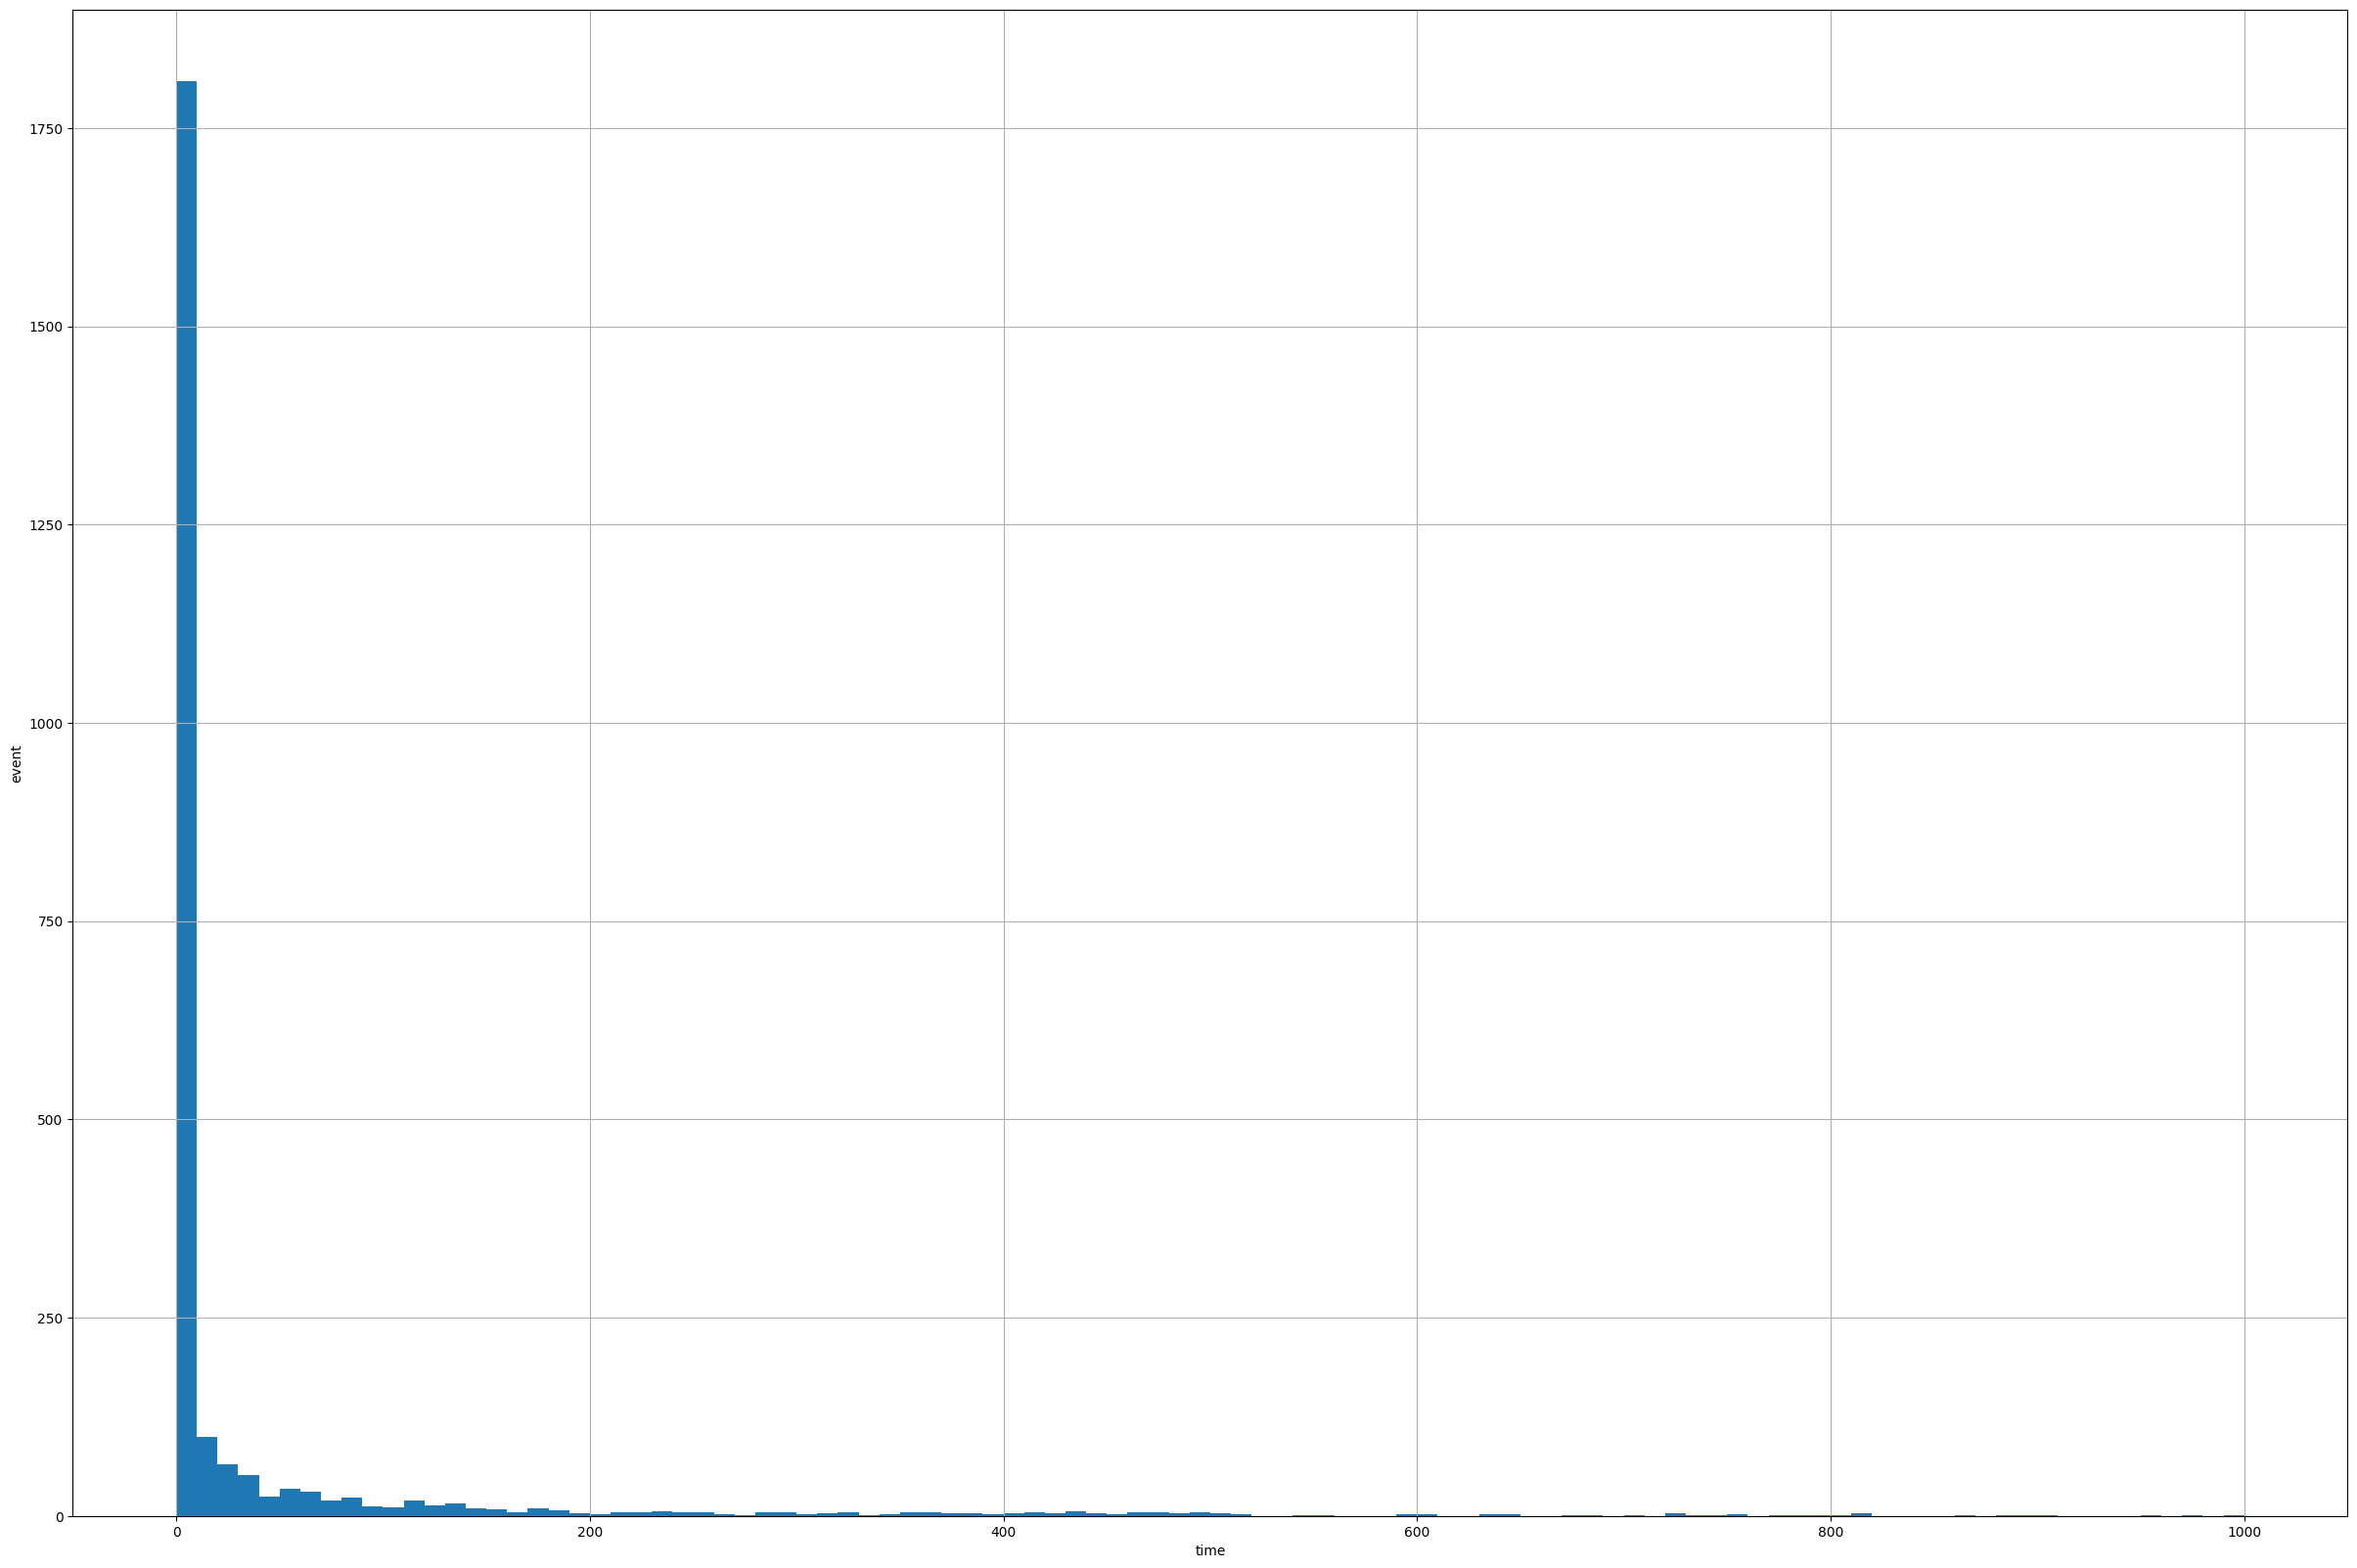

In [133]:
# сделай гистограмму по колонке time_diff от 0 до 1000 с шагом 10 и сделай большую картинку и подпиши оси 
df['time_diff'].hist(bins=100, range=(0, 1000), figsize=(30,20))
plt.xlabel('time')
plt.ylabel('event')
plt.show()



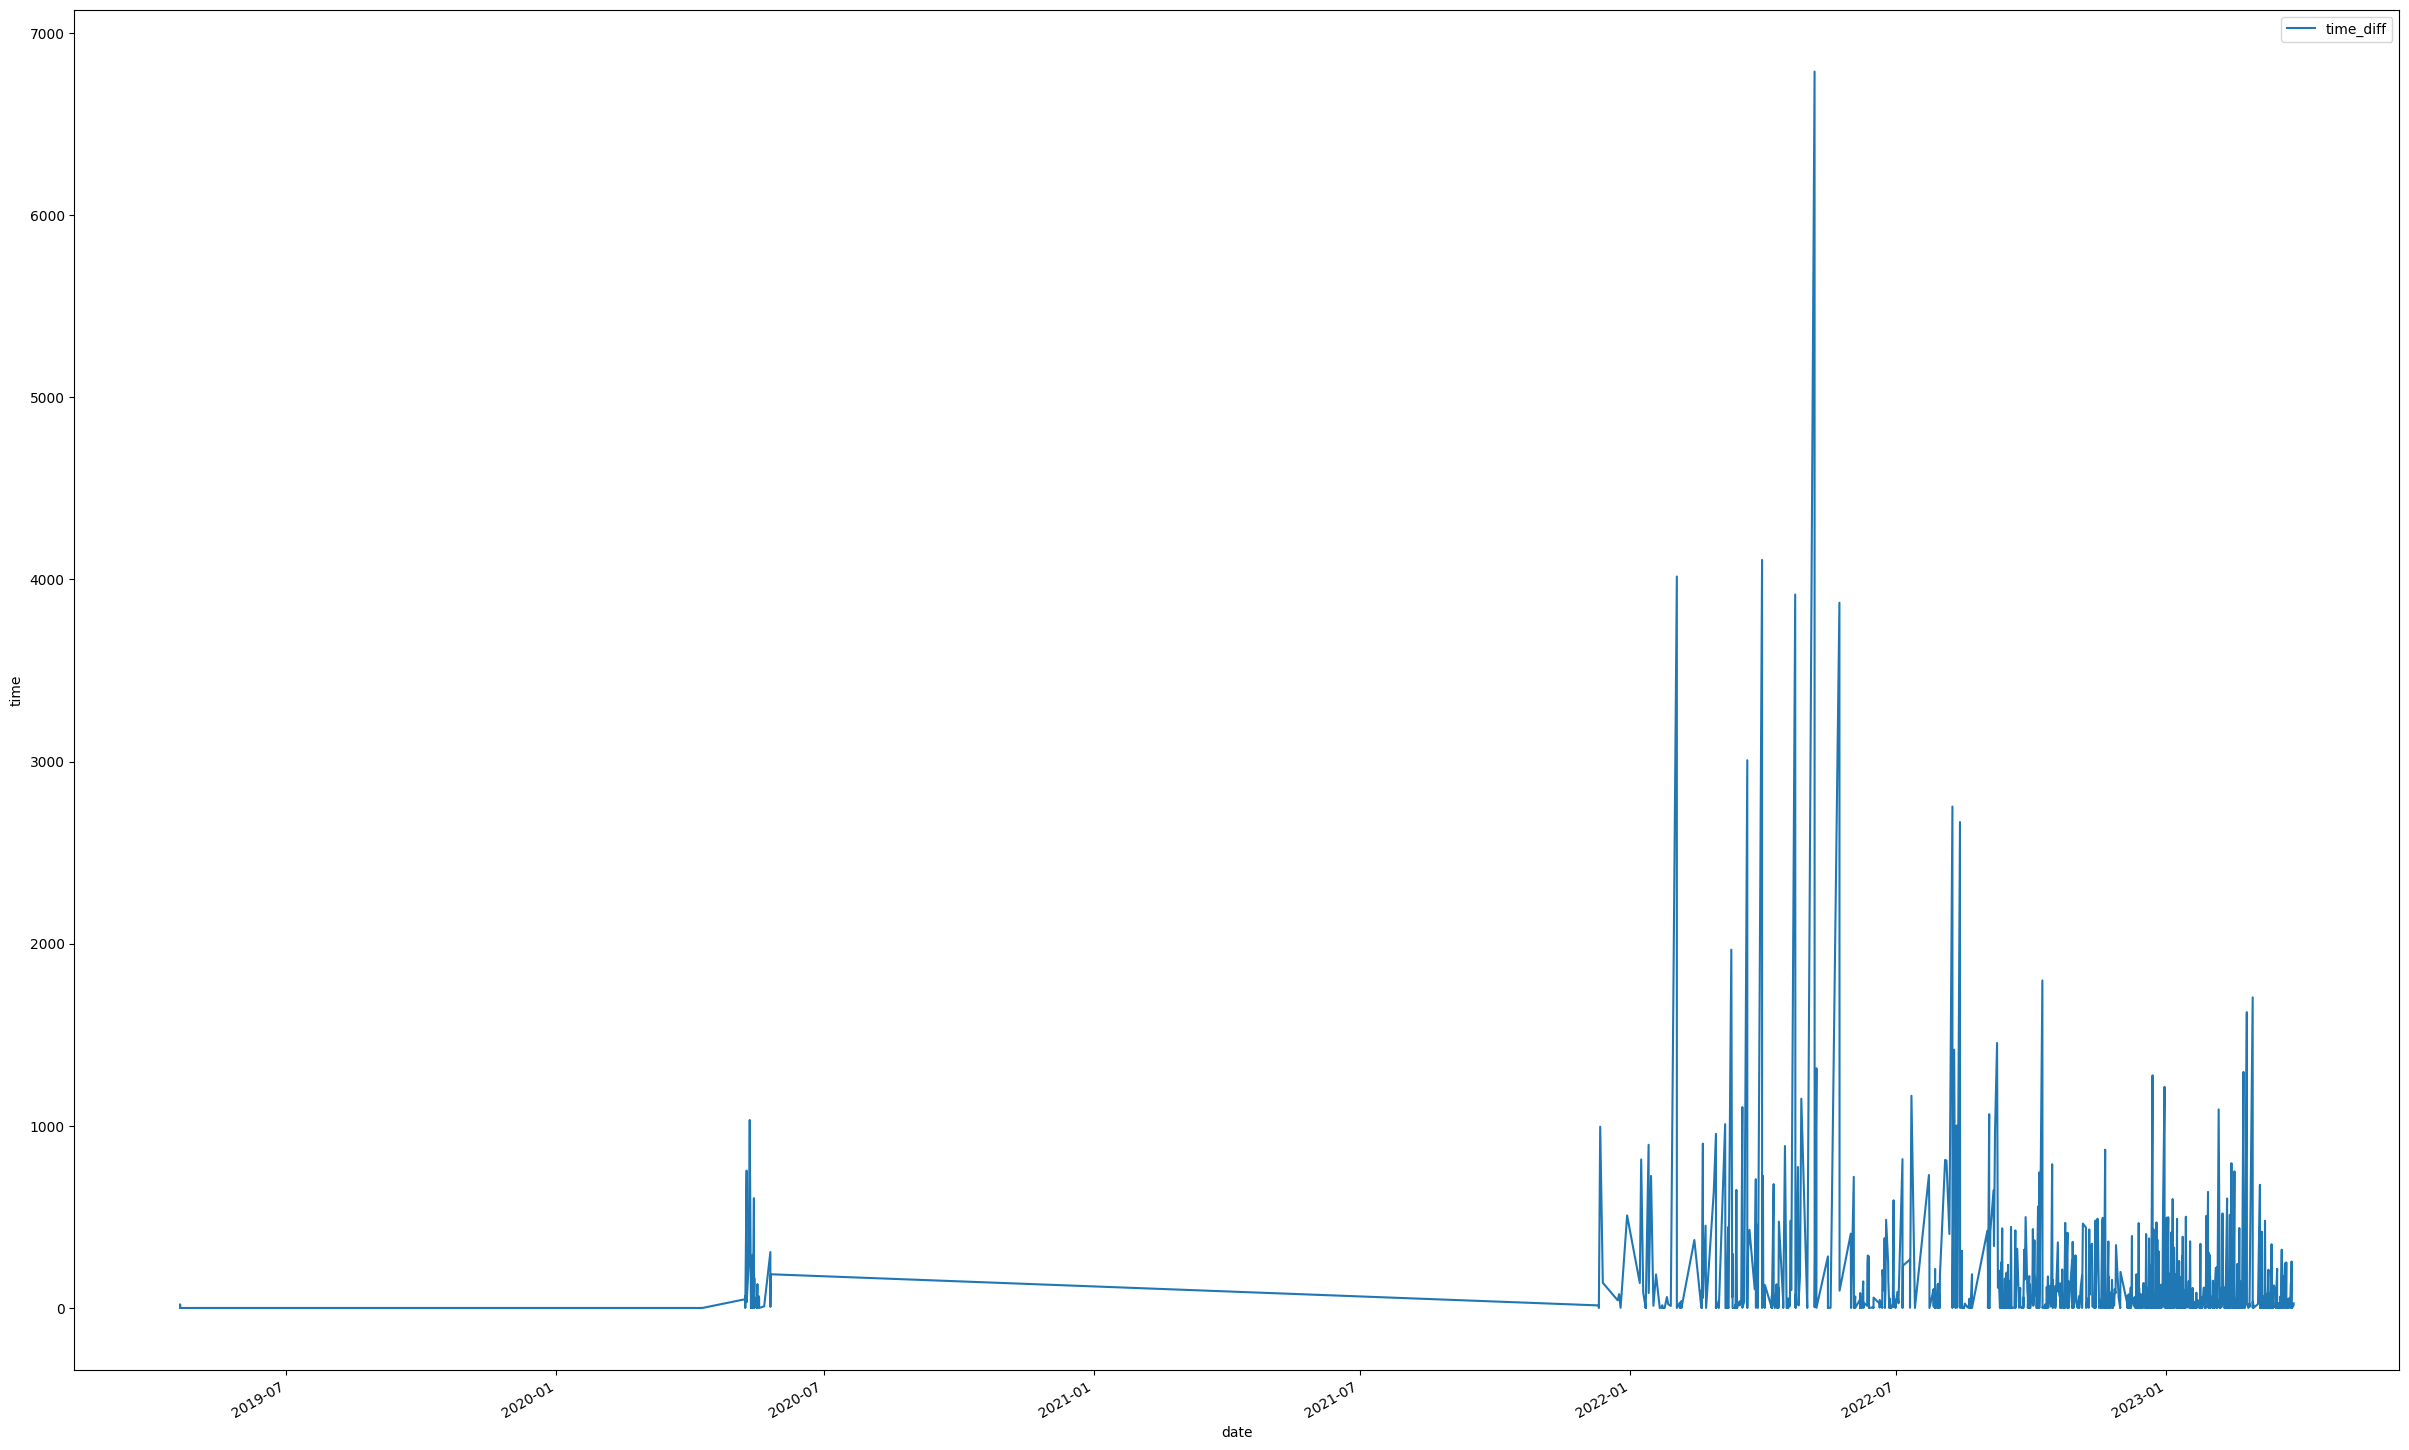

In [134]:
# сделай график по колонке time_diff по y и date по x и сделай большую картинку и подпиши оси
df.plot(x='date', y='time_diff', figsize=(30,20))
plt.xlabel('date')
plt.ylabel('time')
plt.show()
 


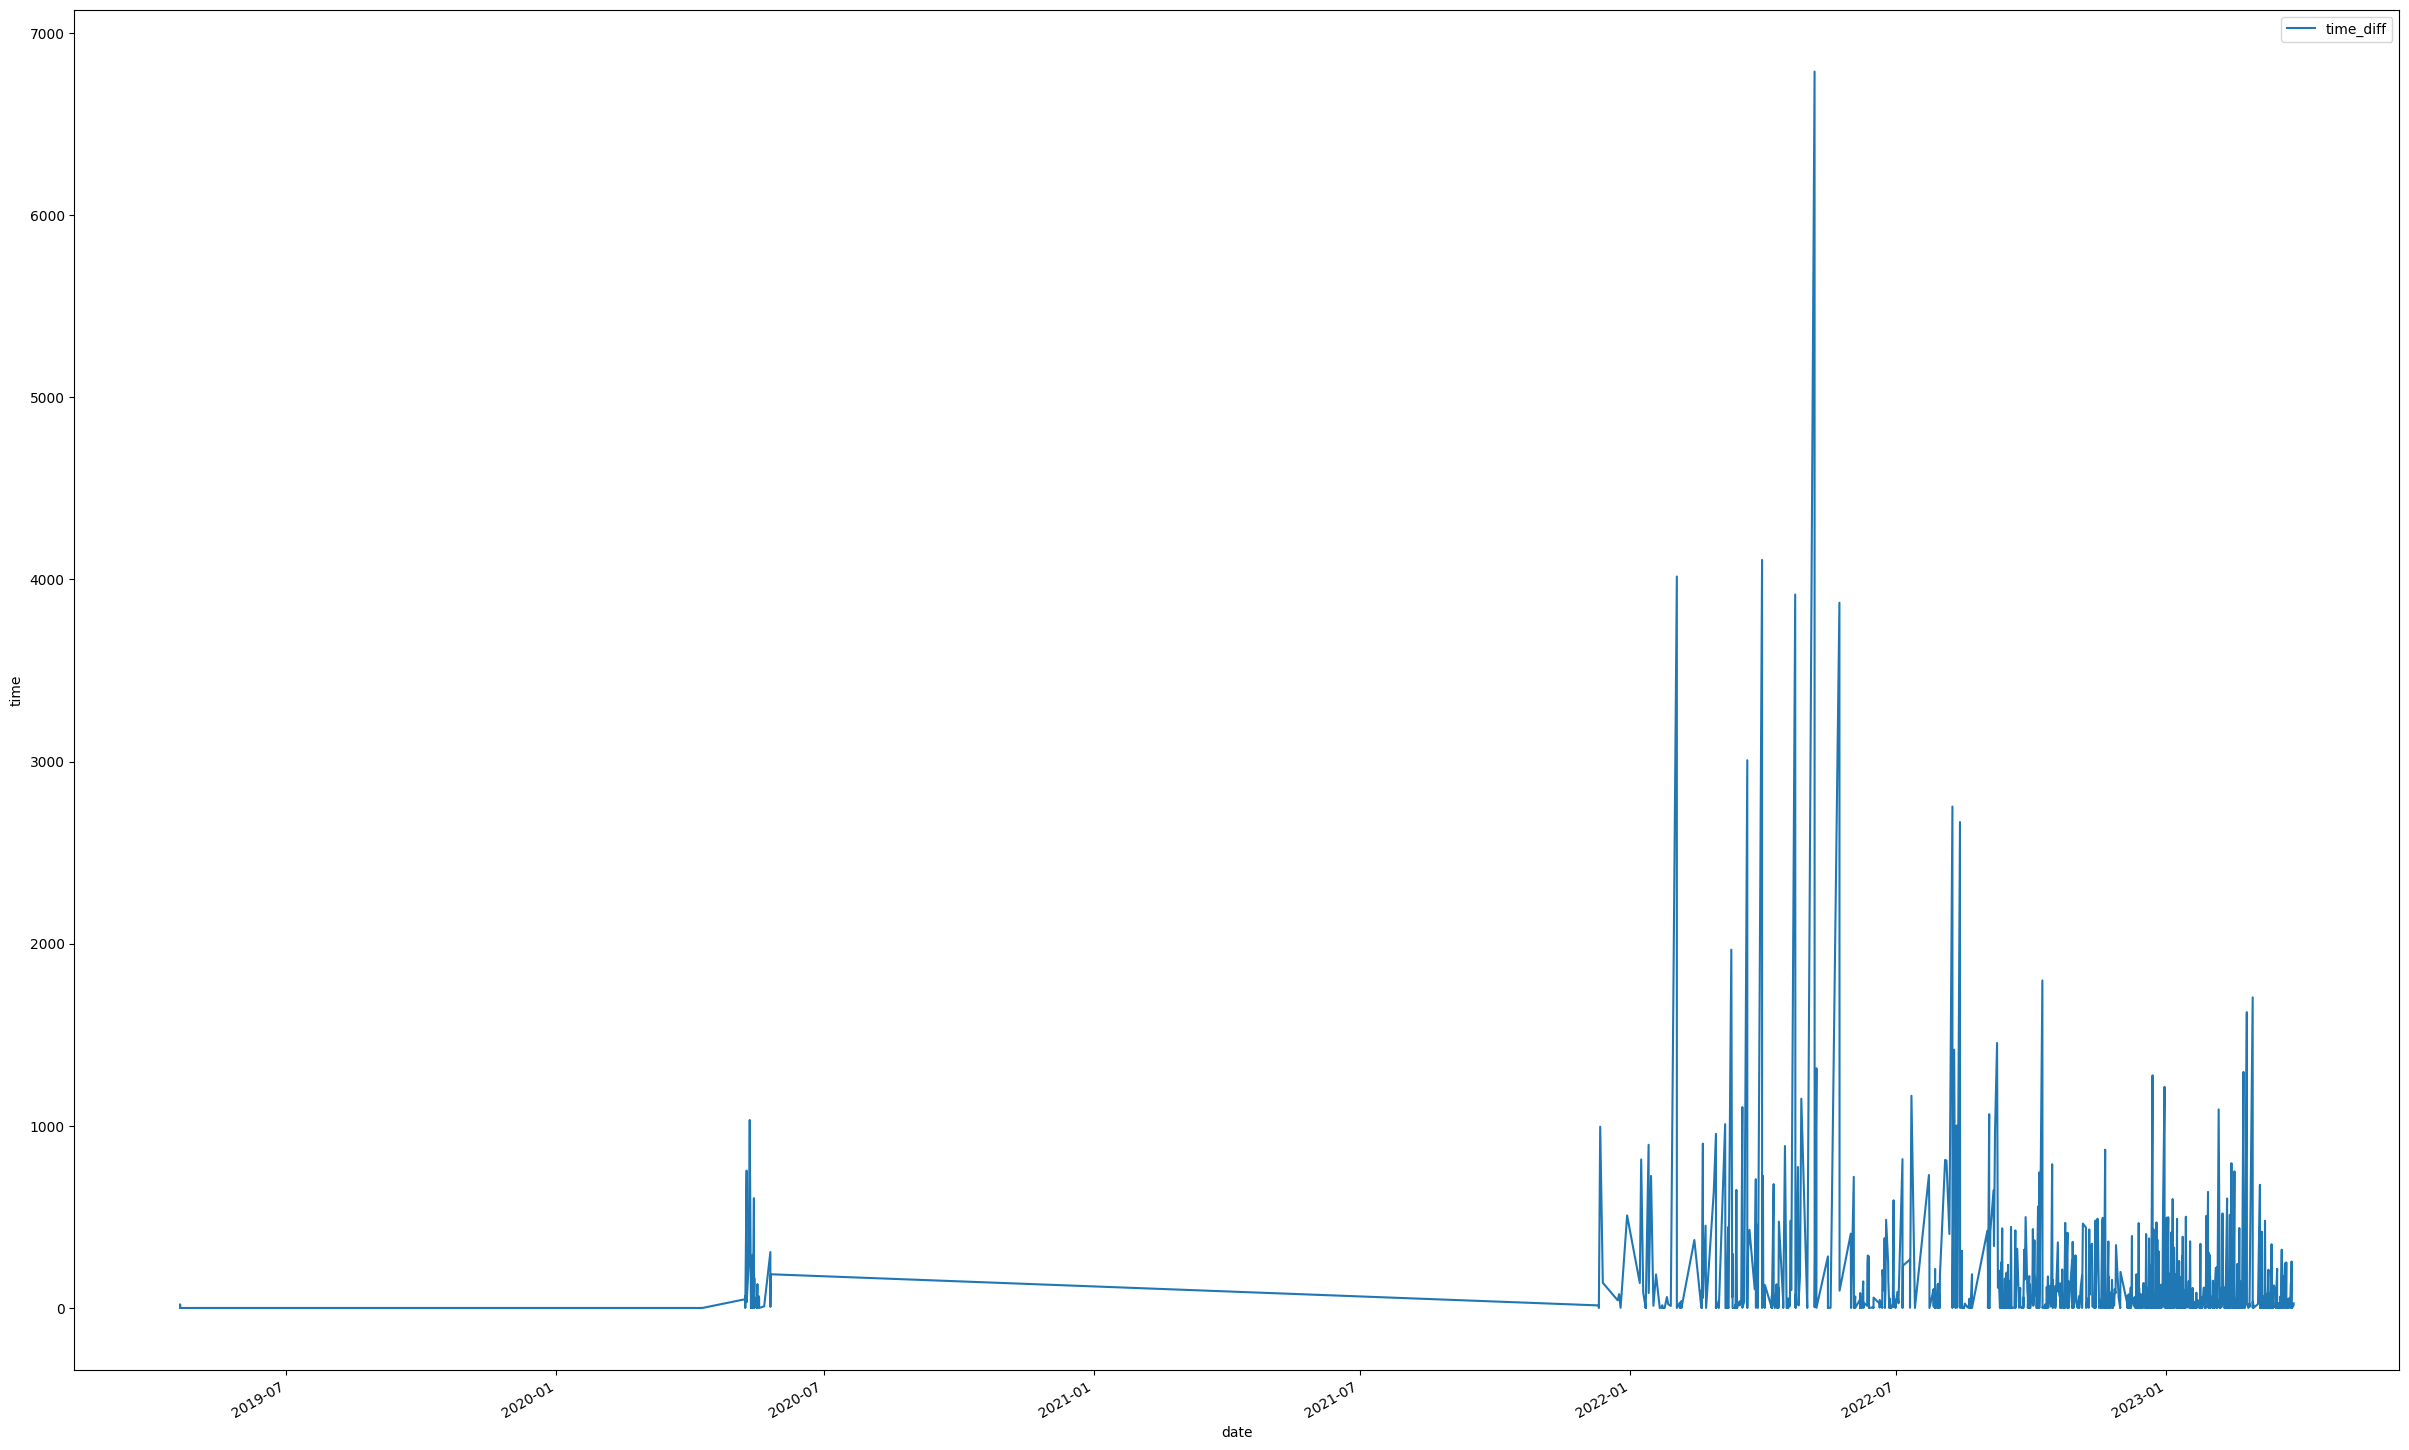

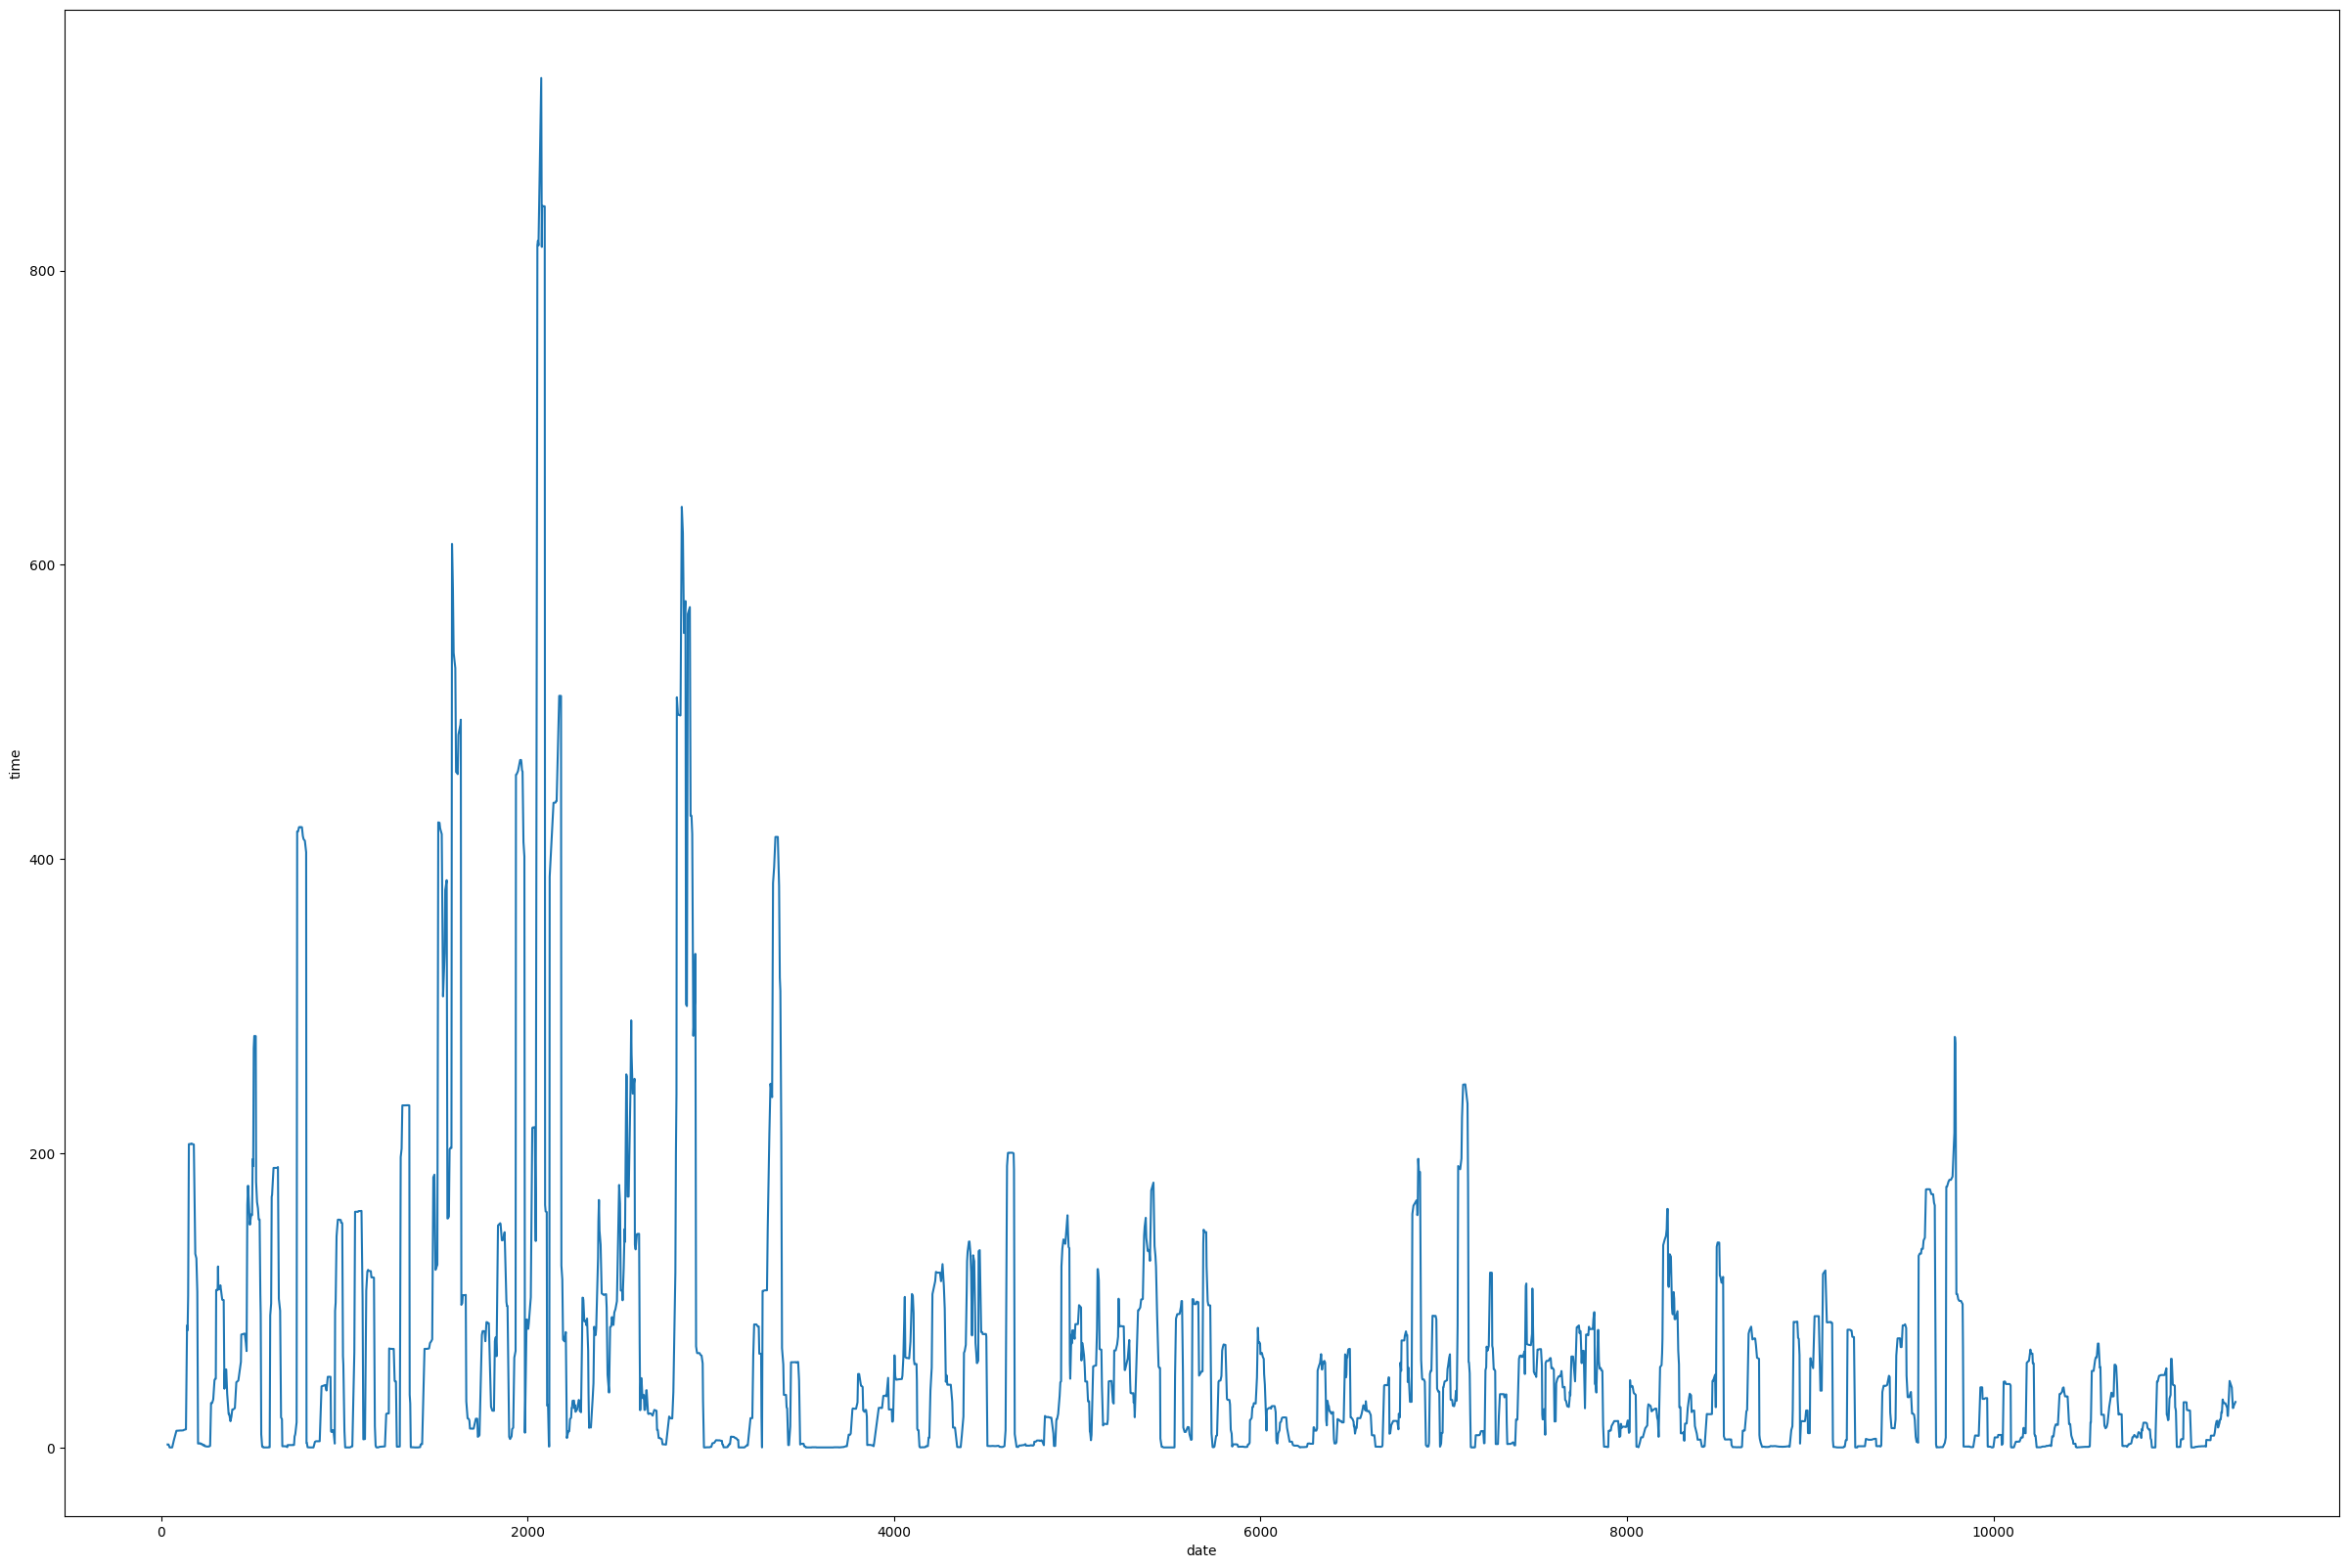

In [135]:
# сделай график по колонке time_diff по y и date по x и сделай большую картинку и подпиши оси и сделай скользящее среднее по 10 точкам
df.plot(x='date', y='time_diff', figsize=(30,20))
plt.xlabel('date')
plt.ylabel('time')
plt.show()
df['time_diff'].rolling(10).mean().plot(figsize=(30,20))
plt.xlabel('date')
plt.ylabel('time')
plt.show()



In [136]:
# сделай анализ по дням в неделю по date и времени ответа по time_diff
df['day_of_week'] = df['date'].dt.dayofweek
df['day_of_week'] = df['day_of_week'].apply(lambda x: 'пн' if x == 0 else 'вт' if x == 1 else 'ср' if x == 2 else 'чт' if x == 3 else 'пт' if x == 4 else 'сб' if x == 5 else 'вс')
df
    


,messages,from,date,file,from_shifted,from_shifted_time,time_diff,day_of_week
1,"[марк, так, что, вы, там, с, артёмом, делали]",сестра тюленям,2019-04-19 22:01:13,None,None,NaT,0,пт
5,"[вся, инфа, упомянутая, в, нашей, беседе, конф...",сестра тюленям,2019-04-19 22:24:31,None,Марк,2019-04-19 22:04:01,20,пт
16,"[там, же, с, первого, раза, не, у, всех, эффек...",сестра тюленям,2019-04-19 22:37:12,None,Марк,2019-04-19 22:37:07,0,пт
18,[капец],сестра тюленям,2019-04-19 22:37:17,None,Марк,2019-04-19 22:37:16,0,пт
21,"[купи, второй, раз]",сестра тюленям,2019-04-19 22:37:37,None,Марк,2019-04-19 22:37:35,0,пт
...,...,...,...,...,...,...,...,...
11301,"[норм, вопрос]",сестра тюленям,2023-03-27 14:01:11,None,Марк,2023-03-27 13:54:28,7,пн
11307,[видела],сестра тюленям,2023-03-27 18:37:25,None,Марк,2023-03-27 18:37:13,0,пн
11310,[жестко],сестра тюленям,2023-03-28 12:01:02,None,Марк,2023-03-28 11:51:20,10,вт
11312,[не],сестра тюленям,2023-03-28 17:51:22,None,Марк,2023-03-28 17:39:40,12,вт


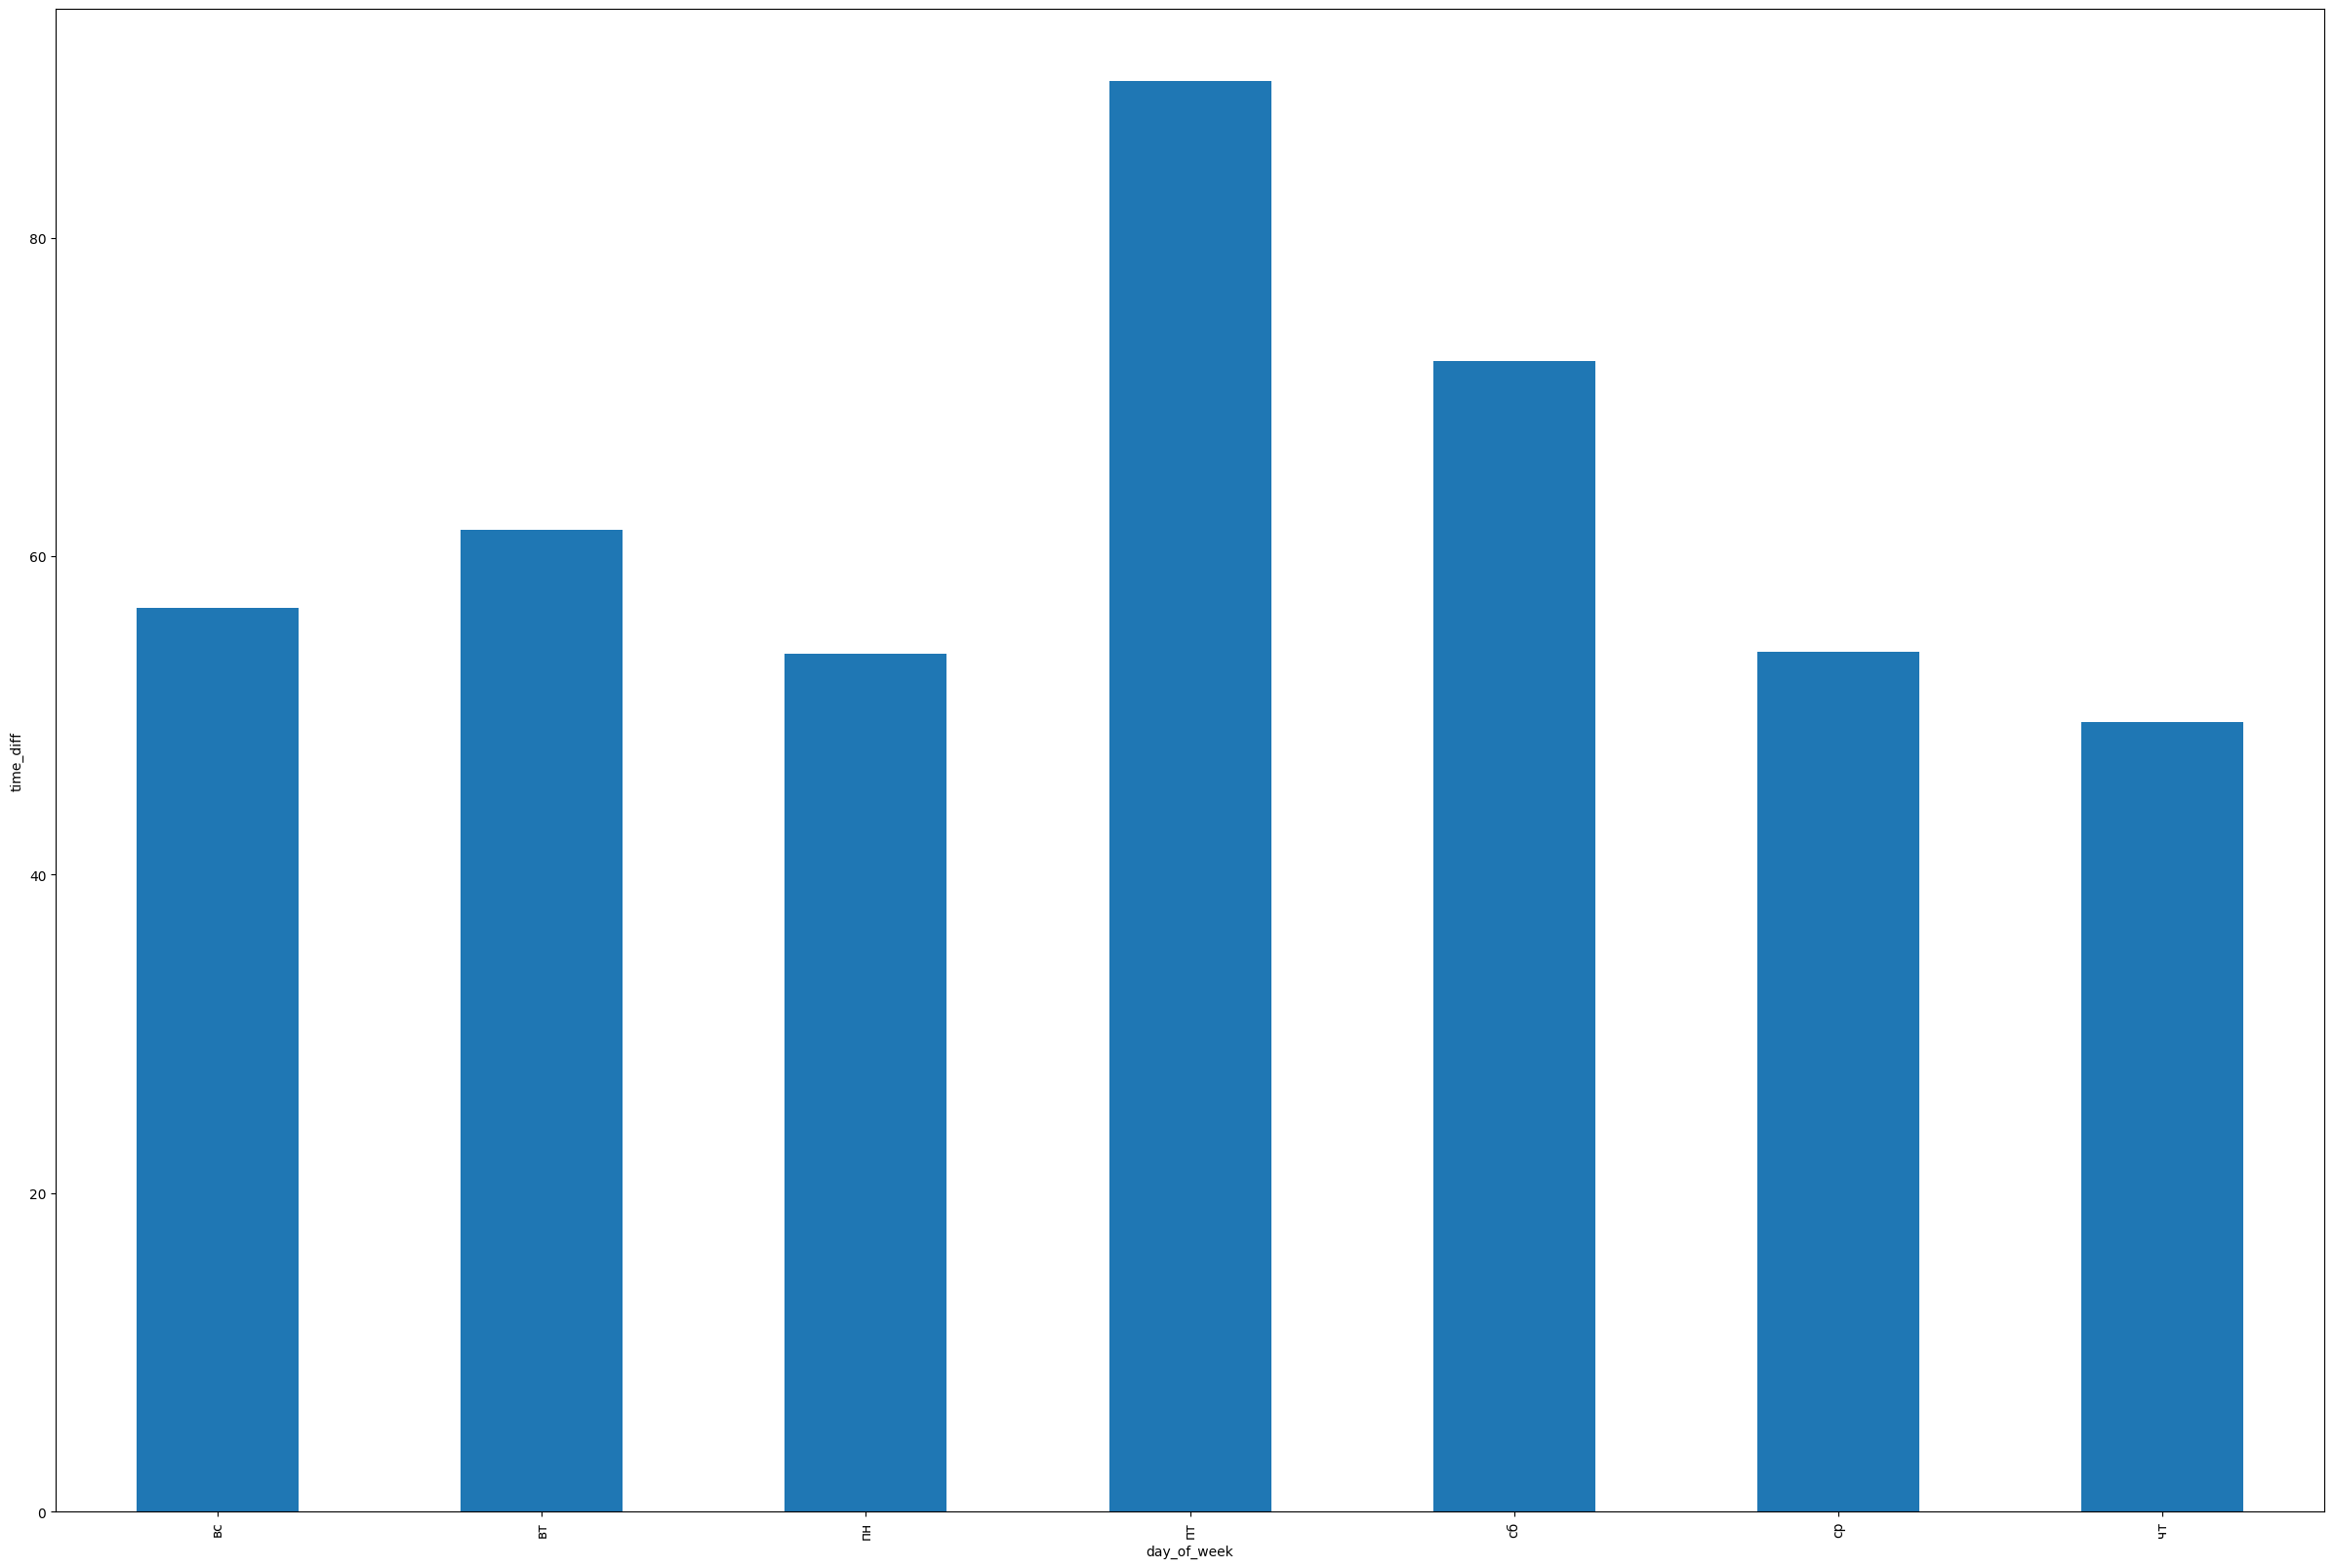

In [137]:
# сделай диаграмму по колонке day_of_week и time_diff и сделай большую картинку и подпиши оси
df.groupby('day_of_week')['time_diff'].mean().plot(kind='bar', figsize=(30,20))
plt.xlabel('day_of_week')
plt.ylabel('time_diff')
plt.show()


In [138]:
# добавь колонку с временем суток по from_shifted_time
df['time_of_day'] = df['from_shifted_time'].dt.hour
df['time_of_day'] = df['time_of_day'].apply(lambda x: 'ночь' if x < 6 else 'утро' if x < 12 else 'день' if x < 18 else 'вечер')
df

,messages,from,date,file,from_shifted,from_shifted_time,time_diff,day_of_week,time_of_day
1,"[марк, так, что, вы, там, с, артёмом, делали]",сестра тюленям,2019-04-19 22:01:13,None,None,NaT,0,пт,вечер
5,"[вся, инфа, упомянутая, в, нашей, беседе, конф...",сестра тюленям,2019-04-19 22:24:31,None,Марк,2019-04-19 22:04:01,20,пт,вечер
16,"[там, же, с, первого, раза, не, у, всех, эффек...",сестра тюленям,2019-04-19 22:37:12,None,Марк,2019-04-19 22:37:07,0,пт,вечер
18,[капец],сестра тюленям,2019-04-19 22:37:17,None,Марк,2019-04-19 22:37:16,0,пт,вечер
21,"[купи, второй, раз]",сестра тюленям,2019-04-19 22:37:37,None,Марк,2019-04-19 22:37:35,0,пт,вечер
...,...,...,...,...,...,...,...,...,...
11301,"[норм, вопрос]",сестра тюленям,2023-03-27 14:01:11,None,Марк,2023-03-27 13:54:28,7,пн,день
11307,[видела],сестра тюленям,2023-03-27 18:37:25,None,Марк,2023-03-27 18:37:13,0,пн,вечер
11310,[жестко],сестра тюленям,2023-03-28 12:01:02,None,Марк,2023-03-28 11:51:20,10,вт,утро
11312,[не],сестра тюленям,2023-03-28 17:51:22,None,Марк,2023-03-28 17:39:40,12,вт,день


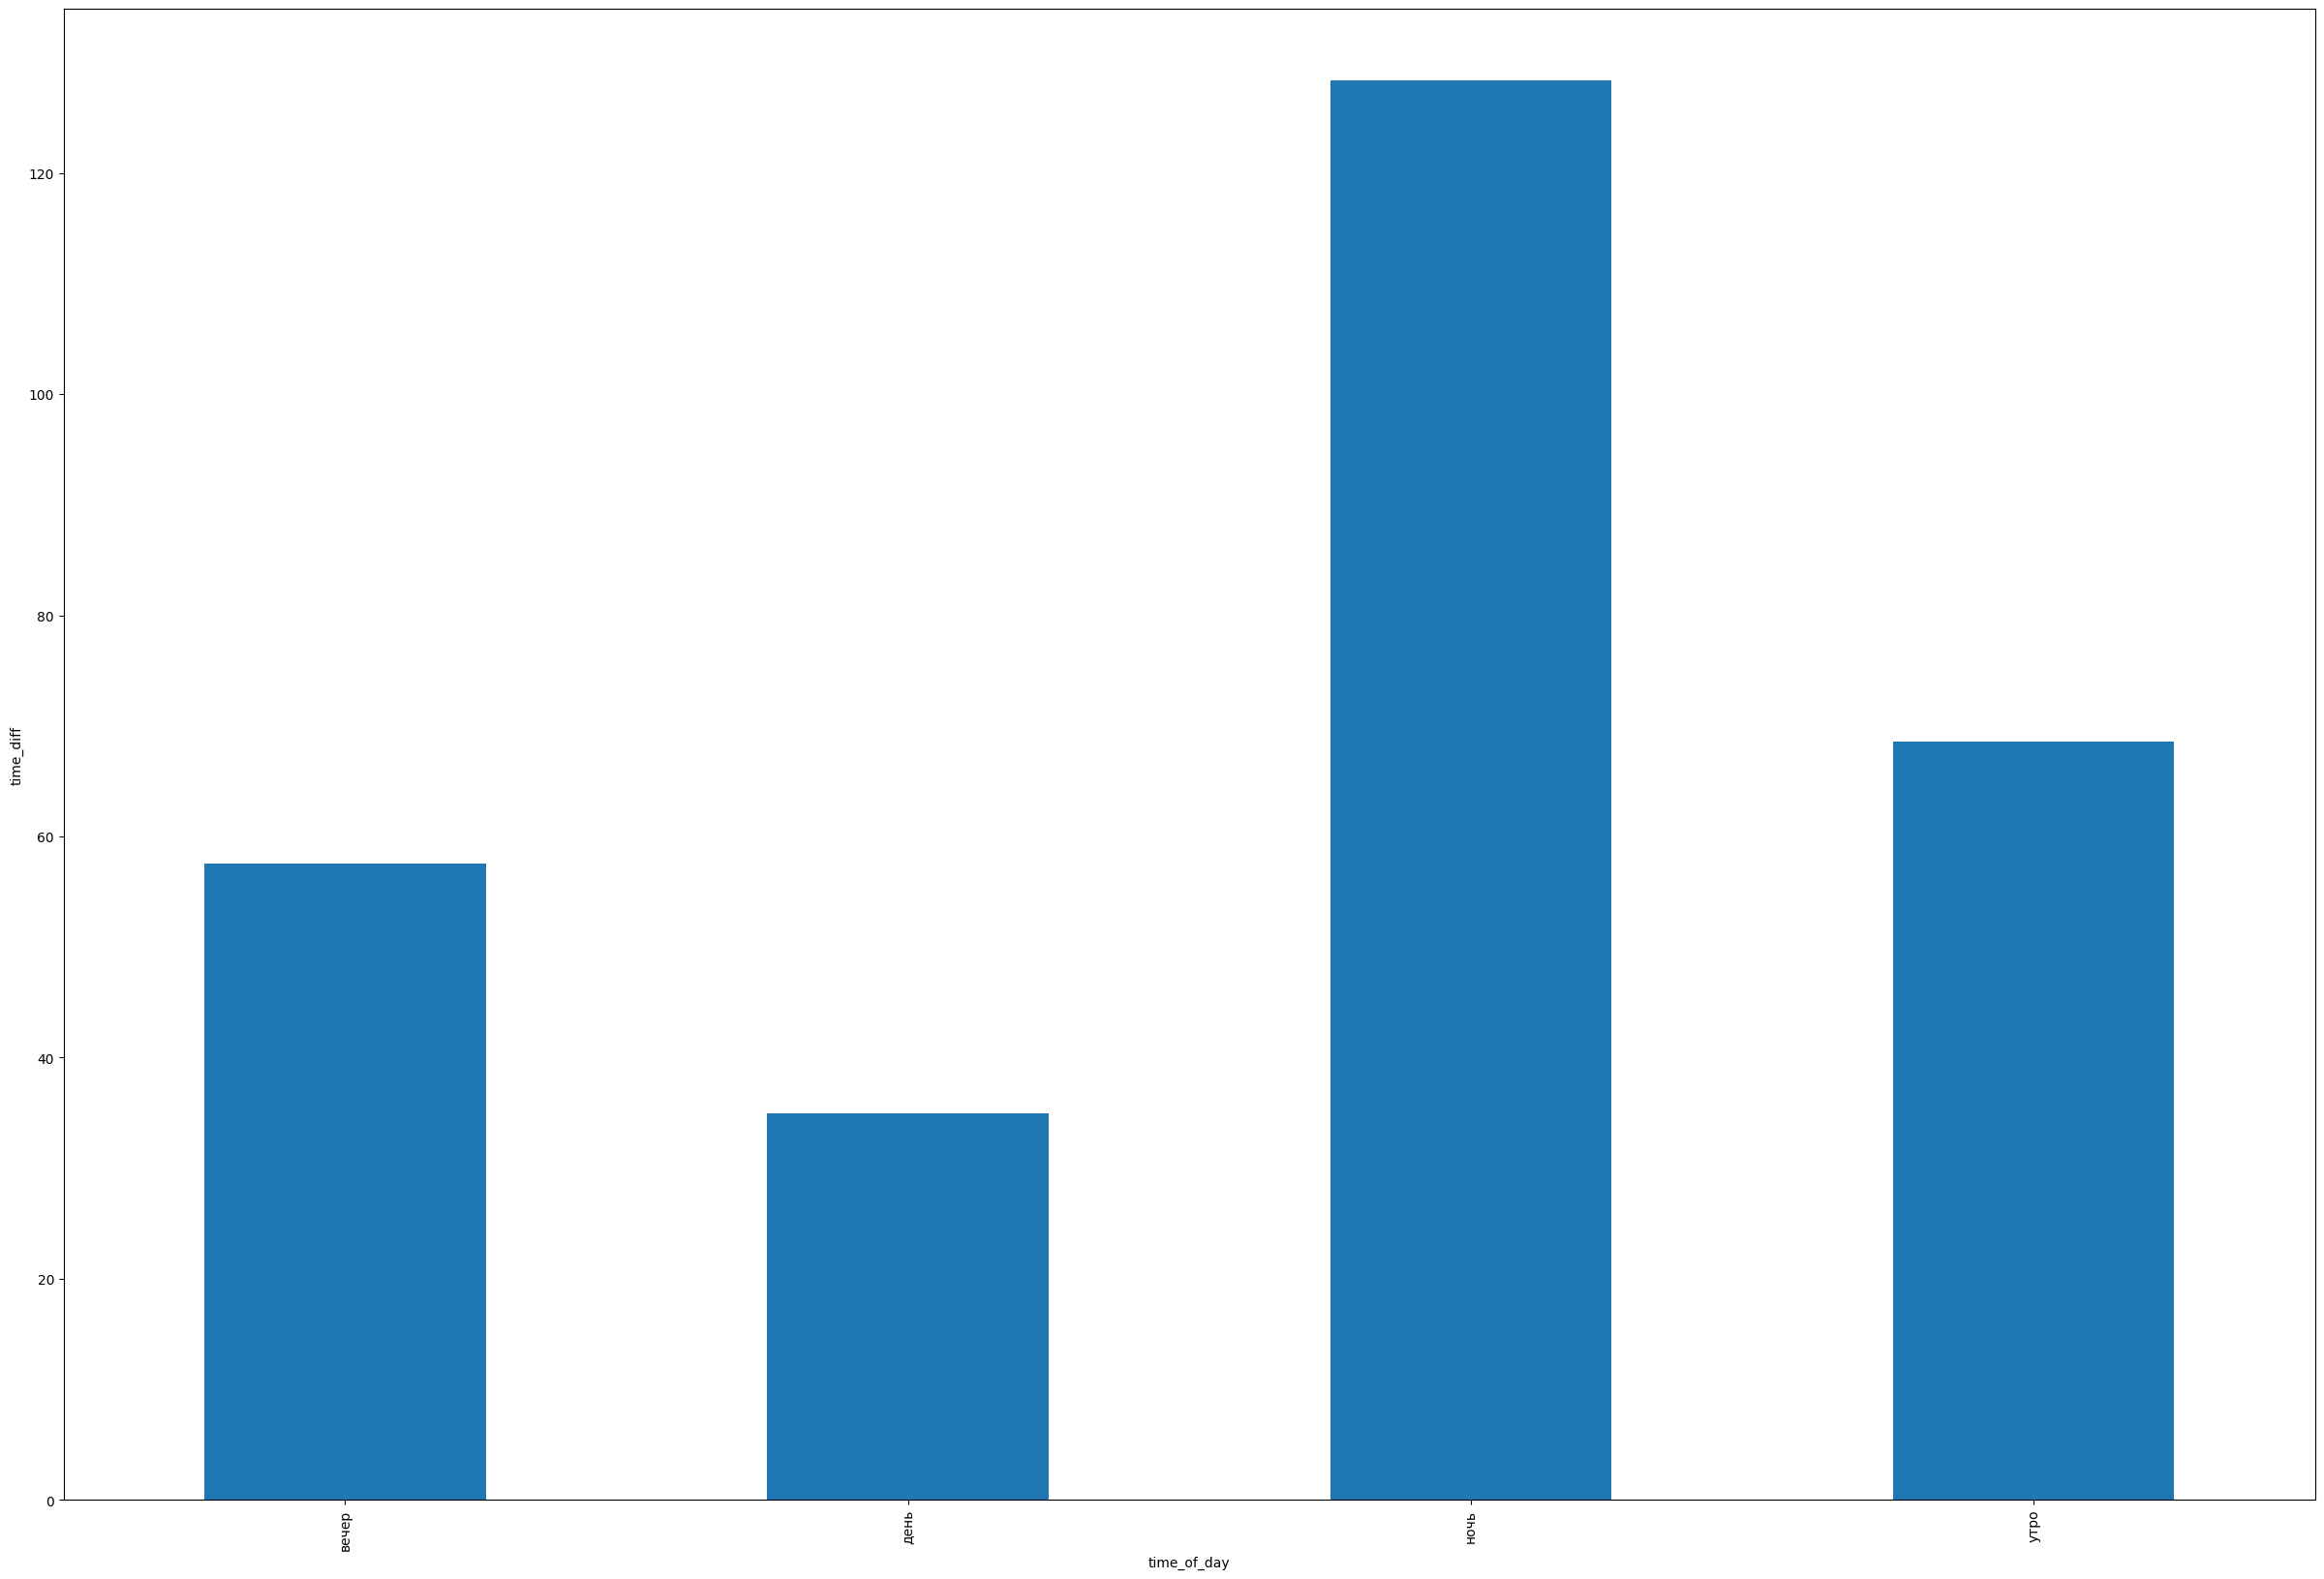

In [139]:
# сделай диаграмму по колонке day_of_week и time_diff и сделай большую картинку и подпиши оси
df.groupby('time_of_day')['time_diff'].mean().plot(kind='bar', figsize=(30,20))
plt.xlabel('time_of_day')
plt.ylabel('time_diff')
plt.show()